<a href="https://colab.research.google.com/github/wendell8/Fontes-equivalentes/blob/main/Uso_de_camada_equivalente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pyproj
import pooch
import pandas as pd
import numpy as np
import xarray as xr
import verde as vd
import boule as bl
import harmonica as hm
import matplotlib.pyplot as plt

In [ ]:
pip install harmonica

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 5.0 MB/s 


In [16]:
from matplotlib import rcParams
rcParams["figure.dpi"] = 150

In [ ]:
data = pd.read_csv('/content/Dados1134.csv')

In [17]:
data

,Unnamed: 0,X,Y,FIDUCIAL,GPSALT,BARO,ALTURA,MDT,MAGBASE,MAGBRU,MAGCOM,MAGCOR,MAGNIV,MAGMIC,MAGIGRF,IGRF,LONGITUDE,LATITUDE,DATA,HORA
7524,2989327,655652,9104377,8381.8,393.48,410.13,80.88,312.60,24189.442,24668.010,24663.357,24677.897,24664.570,24664.761,29.840,24634.921,-55.587328,-8.099998,2015/08/21,19:32:52.8
7525,2989328,655652,9104384,8381.9,393.65,410.40,80.74,312.91,24189.441,24668.662,24664.002,24678.574,24665.243,24665.429,30.493,24634.937,-55.587328,-8.099932,2015/08/21,19:32:52.9
7526,2989329,655652,9104391,8382.0,393.82,410.66,81.73,312.09,24189.440,24669.336,24664.666,24679.249,24665.915,24666.096,31.143,24634.953,-55.587328,-8.099867,2015/08/21,19:32:53.0
7527,2989330,655652,9104399,8382.1,394.00,410.93,83.18,310.82,24189.439,24670.020,24665.339,24679.919,24666.581,24666.757,31.789,24634.969,-55.587329,-8.099801,2015/08/21,19:32:53.1
7528,2989331,655652,9104406,8382.2,394.18,411.20,87.70,306.48,24189.438,24670.707,24666.015,24680.580,24667.238,24667.409,32.424,24634.985,-55.587329,-8.099735,2015/08/21,19:32:53.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66503,3443650,665161,9115371,3503.9,409.10,413.42,108.28,300.82,24192.445,24746.675,24741.713,24751.619,24737.740,24734.758,76.183,24658.575,-55.501419,-8.000278,2015/08/28,18:01:53.9
66504,3443651,665161,9115378,3504.0,409.13,413.33,106.78,302.35,24192.444,24746.811,24741.855,24751.693,24737.814,24734.839,76.248,24658.591,-55.501417,-8.000213,2015/08/28,18:01:54.0
66505,3443652,665161,9115385,3504.1,409.05,413.33,106.77,302.28,24192.442,24746.923,24741.972,24751.752,24737.874,24734.910,76.303,24658.607,-55.501415,-8.000149,2015/08/28,18:01:54.1
66506,3443653,665161,9115392,3504.2,408.97,413.33,106.00,302.97,24192.441,24747.011,24742.064,24751.805,24737.927,24734.974,76.352,24658.623,-55.501413,-8.000084,2015/08/28,18:01:54.2


In [ ]:
# Slice a smaller portion of the survey data to speed-up calculations for this
# example
region = [-55.59, -55.50,-8.1, -8]
# Obtenha uma matriz com as coordenadas do conjunto de dados
# que estão dentro da região de corte: 
inside = vd.inside((data.LONGITUDE, data.LATITUDE), region)

# Obtenha um conjunto de dados menor e substitua-o no original:
data = data[inside]
print("Number of data points:", data.shape[0])
print("Mean height of observations:", data.ALTURA.mean())

Number of data points: 30275
Mean height of observations: 103.32230156895129


In [ ]:
# Coordenadas dos levantamentos
long_all = data.LONGITUDE
lat_all = data.LATITUDE
# Anomalia de Campo Total
act_all = data.MAGIGRF

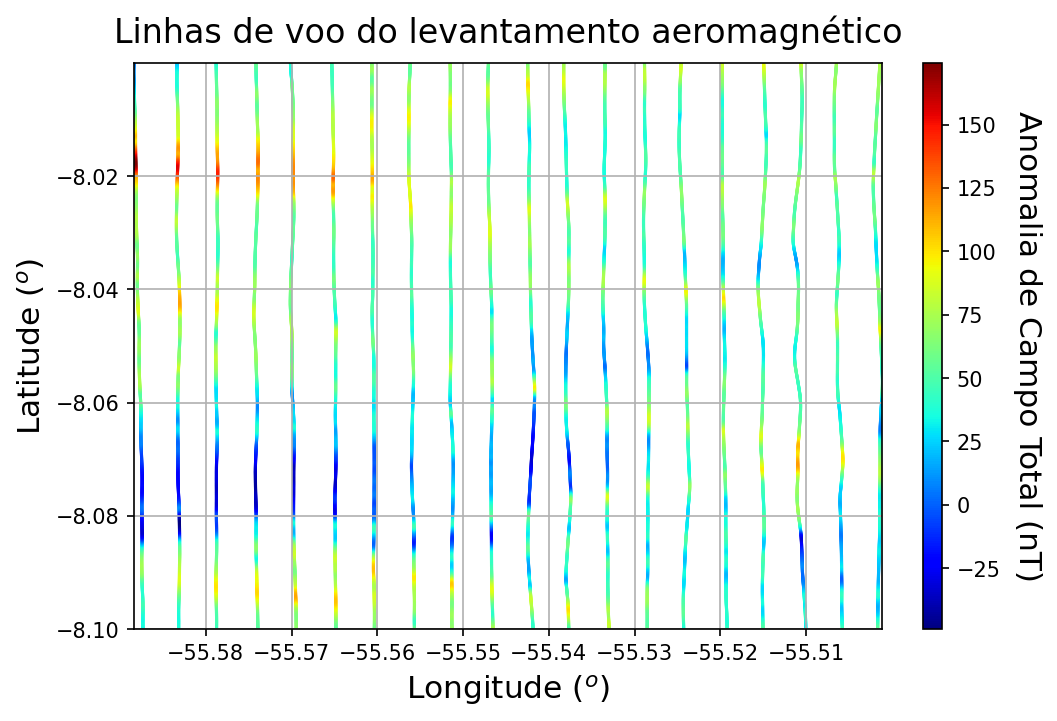

In [ ]:
figure1 = plt.figure(figsize=(7,5))

p1 = plt.scatter(long_all, lat_all, s = 1., c = act_all, marker = '.', cmap = plt.cm.jet)
cbar1 = plt.colorbar(p1, aspect = 30, fraction = 0.03, orientation = 'vertical')
cbar1.set_label('Anomalia de Campo Total (nT)',fontsize = 15, rotation = -90, labelpad = 20)

plt.title('Linhas de voo do levantamento aeromagnético',fontsize = 16, pad = 10)
plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)
plt.xlim(long_all.min(), long_all.max())
plt.ylim(lat_all.min(), lat_all.max())

# plt.savefig('figure01-flight-lines.png', dpi = 300, transparence = True, bbox_inches = 'tight')
# plt.savefig('figure01-flight-lines.pdf', dpi = 300, transparence = True, bbox_inches = 'tight')
plt.grid()
plt.show()

In [ ]:
projection = pyproj.Proj(proj="merc", lat_ts=data.LATITUDE.values.mean())
easting, northing = projection(data.LONGITUDE.values, data.LATITUDE.values)

In [ ]:
equivalent_sources = hm.EquivalentSources(depth=10e1, damping=10)
equivalent_sources

EquivalentSources(damping=10, depth=100.0)

In [ ]:
coordinates = (easting, northing, data.ALTURA)
equivalent_sources.fit(coordinates, data.MAGIGRF)

EquivalentSources(damping=10, depth=100.0)

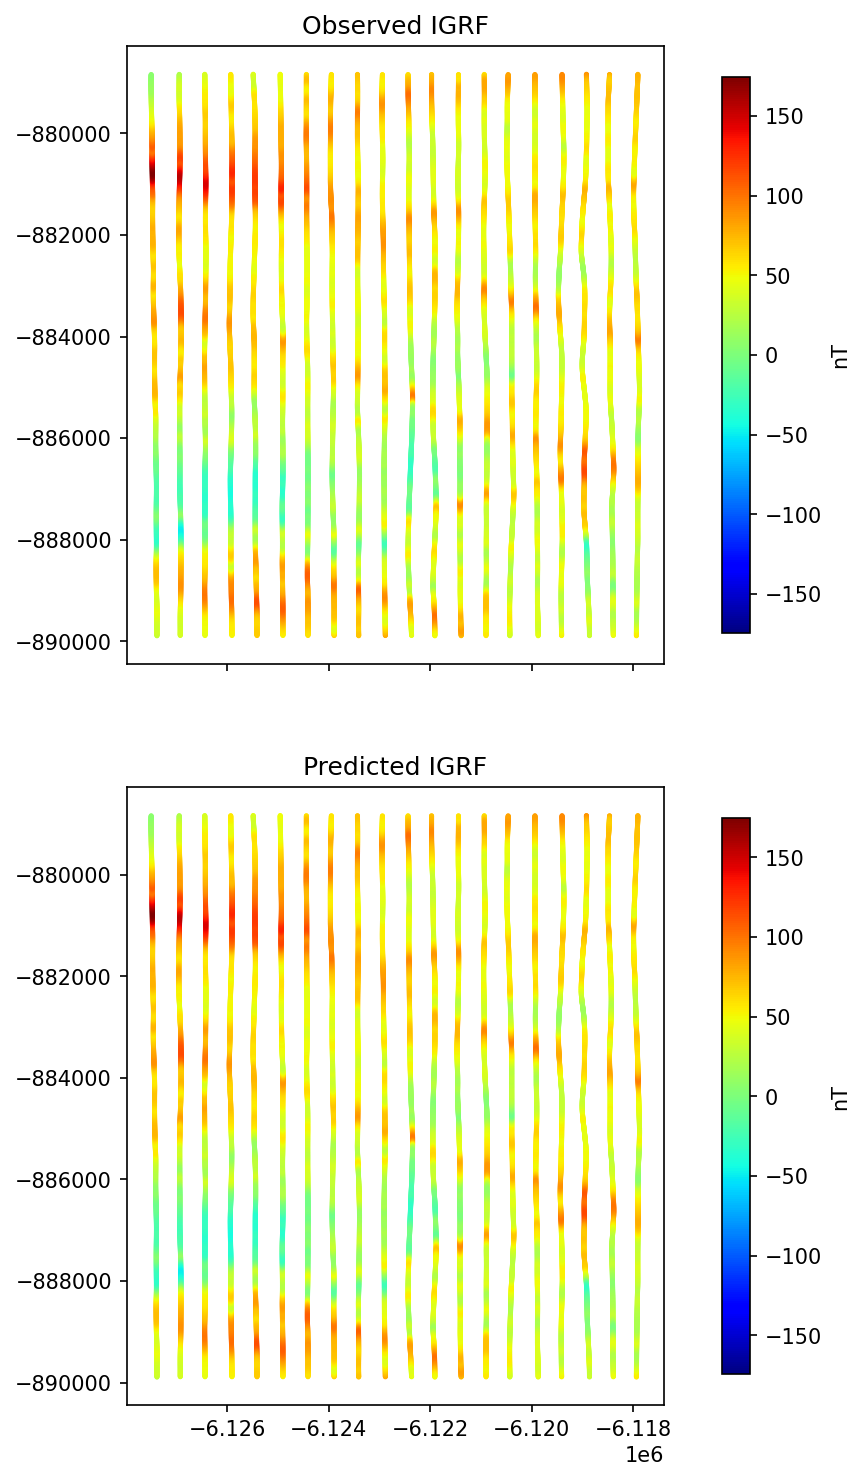

In [ ]:
# Get max absolute value for the observed gravity disturbance
maxabs = vd.maxabs(data.MAGIGRF)

# Create a figure with two axes
fig, (ax1, ax2) = plt.subplots(figsize=(10, 12), nrows=2, ncols=1, sharex=True)

# Plot observed and predicted fields
tmp = ax1.scatter(
    easting,
    northing,
    c=data.MAGIGRF,
    s=2,
    vmin=-maxabs,
    vmax=maxabs,
    cmap="jet",
)
ax1.set_title("Observed IGRF")
ax2.scatter(
    easting,
    northing,
    c=data.MAGIGRF,
    s=2,
    vmin=-maxabs,
    vmax=maxabs,
    cmap="jet",
)
ax2.set_title("Predicted IGRF")

for ax in (ax1, ax2):
    ax.set_aspect("equal")
    plt.colorbar(tmp, ax=ax, label="nT", pad=0.05, aspect=20, shrink=0.9)
plt.show()

In [ ]:
data.ALTURA.max()

151.33

In [ ]:
# Get region of the observations
region = vd.get_region(coordinates)

# Build the grid coordinates
grid_coords = vd.grid_coordinates(region=region, spacing=2e1, extra_coords=2.2e3)

# Grid the gravity disturbances
grid = equivalent_sources.grid(grid_coords, data_names=["Magnetic_fild"])
grid

<xarray.Dataset>
Dimensions:        (northing: 554, easting: 482)
Coordinates:
  * easting        (easting) float64 -6.127e+06 -6.127e+06 ... -6.118e+06
  * northing       (northing) float64 -8.899e+05 -8.899e+05 ... -8.788e+05
    upward         (northing, easting) float64 2.2e+03 2.2e+03 ... 2.2e+03
Data variables:
    Magnetic_fild  (northing, easting) float64 25.31 25.37 25.43 ... 32.57 32.5
Attributes:
    metadata:  Generated by EquivalentSources(damping=10, depth=100.0)

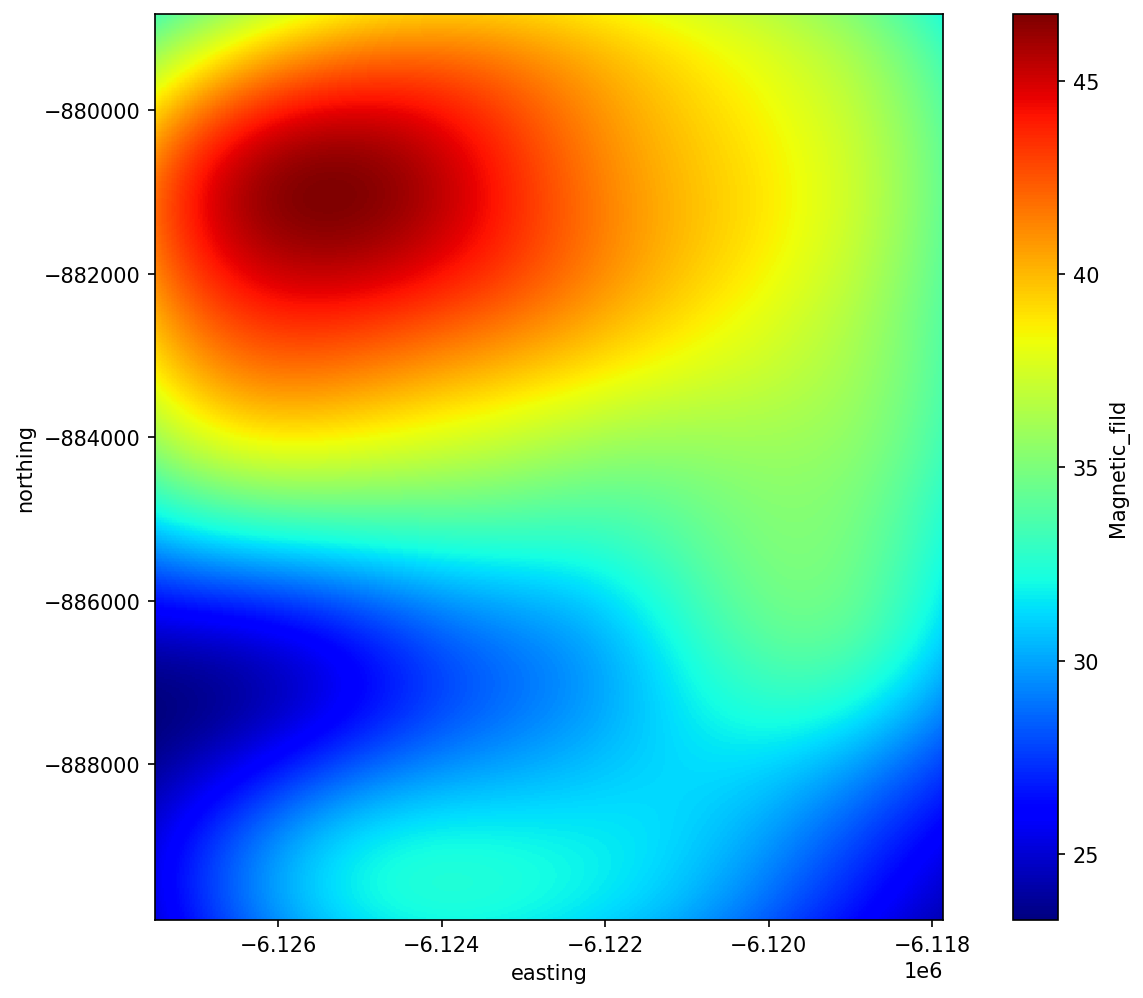

In [18]:
fig = plt.figure(figsize=(12, 8))

grid.Magnetic_fild.plot(cmap="jet")
plt.gca().set_aspect("equal")
plt.show()